In this Project , we’ll be working with daily time series of `Open Power System Data (OPSD) for Germany`, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for **`2006-2017`**.

`Reference` : https://open-power-system-data.org/

`data Source` : https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:

> Date — The date (yyyy-mm-dd format)

> Consumption — Electricity consumption in GWh

> Wind — Wind power production in GWh

> Solar — Solar power production in GWh

> Wind+Solar — Sum of wind and solar power production in GWh

As a project/course work you are suppose to **explore** `how electricity consumption and production in Germany have varied over time`, by answering questions such as:

1. When is electricity consumption typically highest and lowest?

2. How do wind and solar power production vary with seasons of the year?

3. What are the long-term trends in electricity consumption, solar power, and wind power?

4. How do wind and solar power production compare with electricity consumption, and how has this ratio changed over time?

In [ ]:
# Upload the dataset, which was downloaded from the above link.
from google.colab import files
files.upload()

Saving opsd_germany_daily.csv to opsd_germany_daily (1).csv


{'opsd_germany_daily.csv': b'Date,Consumption,Wind,Solar,Wind+Solar\n2006-01-01,1069.1840000000002,,,\n2006-01-02,1380.5210000000002,,,\n2006-01-03,1442.5330000000001,,,\n2006-01-04,1457.2169999999999,,,\n2006-01-05,1477.131,,,\n2006-01-06,1403.4270000000001,,,\n2006-01-07,1300.2870000000003,,,\n2006-01-08,1207.9849999999997,,,\n2006-01-09,1529.3229999999996,,,\n2006-01-10,1576.911,,,\n2006-01-11,1577.1759999999997,,,\n2006-01-12,1553.28,,,\n2006-01-13,1545.0019999999997,,,\n2006-01-14,1359.945,,,\n2006-01-15,1265.475,,,\n2006-01-16,1563.738,,,\n2006-01-17,1598.3029999999999,,,\n2006-01-18,1572.9840000000004,,,\n2006-01-19,1558.29,,,\n2006-01-20,1540.6039999999998,,,\n2006-01-21,1348.188,,,\n2006-01-22,1248.111,,,\n2006-01-23,1569.691,,,\n2006-01-24,1603.2520000000006,,,\n2006-01-25,1613.3119999999997,,,\n2006-01-26,1601.6729999999995,,,\n2006-01-27,1586.0649999999998,,,\n2006-01-28,1373.0300000000002,,,\n2006-01-29,1252.2149999999997,,,\n2006-01-30,1554.7219999999998,,,\n2006-01-31,15

In [ ]:
# step 1
# load the opsd_germany_daily dataset and prepare it as Time Series data

import pandas as pd
opsd_daily = pd.read_csv('opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

The DataFrame has 4383 rows, covering the period from January 1, 2006 through December 31, 2017.

In [ ]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [ ]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [ ]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [ ]:
# Preparing the above df as Time Series dataset. 
# Now that the Date column is the correct data type, 
# let’s set it as the DataFrame’s index.

opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [ ]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

Alternatively, we can consolidate the above steps into a single line, using the `index_col` and `parse_dates` parameters of the read_csv() function. This is often a useful shortcut.

In [ ]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [ ]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name() 

# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


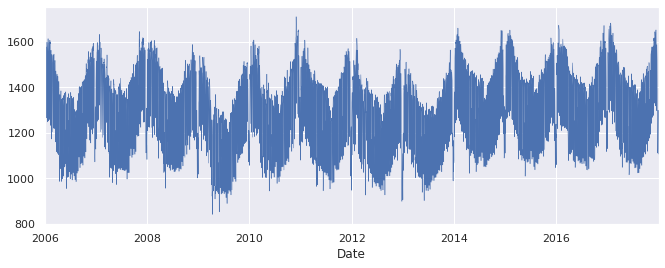

In [ ]:
# Step 2
# Visualizing time series data

import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

opsd_daily['Consumption'].plot(linewidth=0.5);
plt.show();

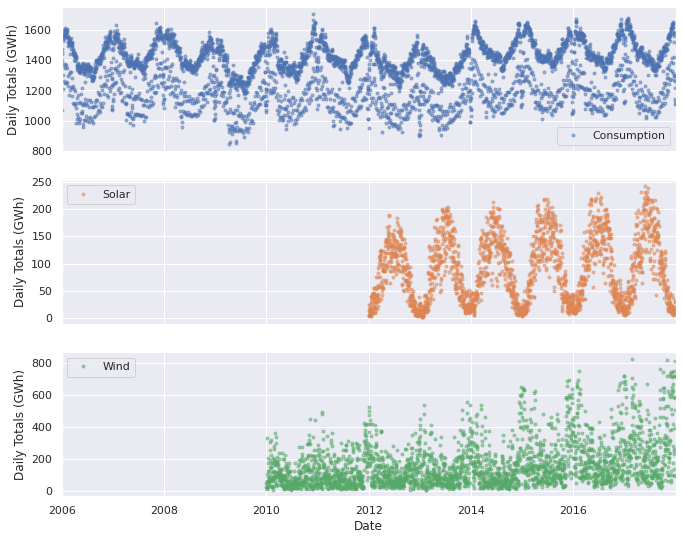

In [ ]:
# With so many data points, the line plot is crowded and hard to read. 
# Let’s plot the data as dots instead, and also look at the Solar and Wind time series.

cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

**`Observations`**

1. Electricity consumption is highest in winter, presumably due to electric heating and increased lighting usage, and lowest in summer.


2. Electricity consumption appears to split into two clusters — one with oscillations centered roughly around 1400 GWh, and another with fewer and more scattered data points, centered roughly around 1150 GWh. *One might guess that these clusters correspond with weekdays and weekends, and this will have to be investigated further in this project (done in next cell)*.


3. Solar power production is highest in summer, when sunlight is most abundant, and lowest in winter.


4. Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.


5. There appears to be a strong increasing trend in wind power production over the years.


6. All three time series clearly exhibit `seasonality`. The Consumption, Solar, and Wind time series oscillate between high and low values on a yearly time scale, corresponding with the seasonal changes in weather over the year. ***However, seasonality in general does not have to correspond with the meteorological seasons. For example, retail sales data often exhibits yearly seasonality with increased sales in November and December, leading up to the holidays.*** Seasonality can also occur on other time scales. The plot above suggests there may be some weekly seasonality in Germany’s electricity consumption, corresponding with weekdays and weekends. 

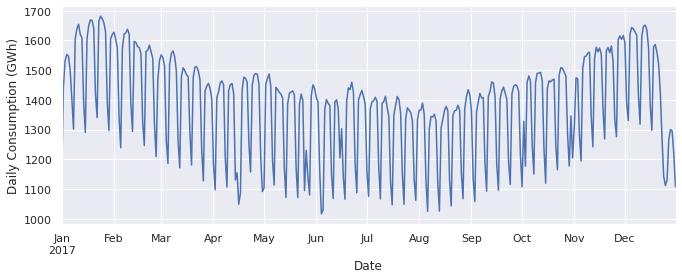

In [ ]:
# plotting time series of a single year to investigate weekday and weekend consumption.

ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

**`observation`**
Now we can clearly see the weekly oscillations. Another interesting feature that becomes apparent at this level of granularity is the drastic decrease in electricity consumption in early January and late December, during the holidays.

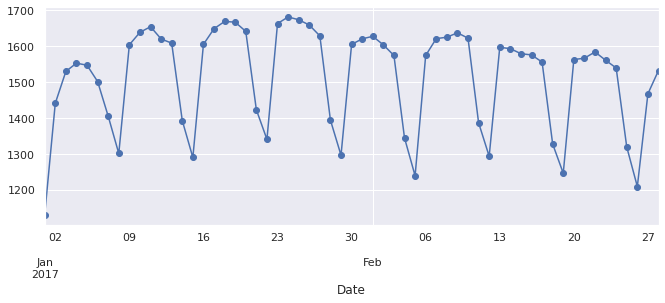

In [ ]:
# zoom in further and look at just January and February.
# to investigate about weekday and weekend consumption

x = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

As we suspected, `consumption is highest on weekdays and lowest on weekends`.

**To better visualize** the **`weekly seasonality`** in electricity consumption in the plot above, it would be nice to have vertical gridlines on a weekly time scale (instead of on the first day of each month).

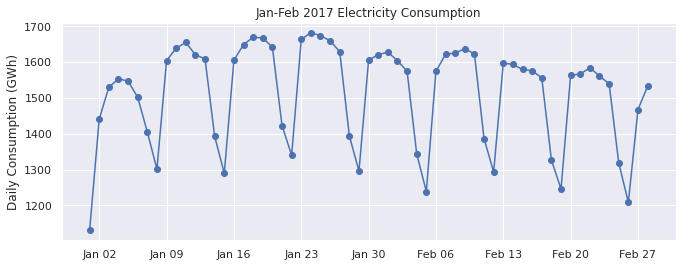

In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

*Now we have vertical gridlines and nicely formatted tick labels on each Monday, so we can easily tell which days are weekdays and weekends.*

**`Seasonality`**

Next, let’s further explore the seasonality of our data with box plots, using seaborn’s boxplot() function to group the data by different time periods and display the distributions for each group. We’ll first group the data by month, to visualize yearly seasonality.

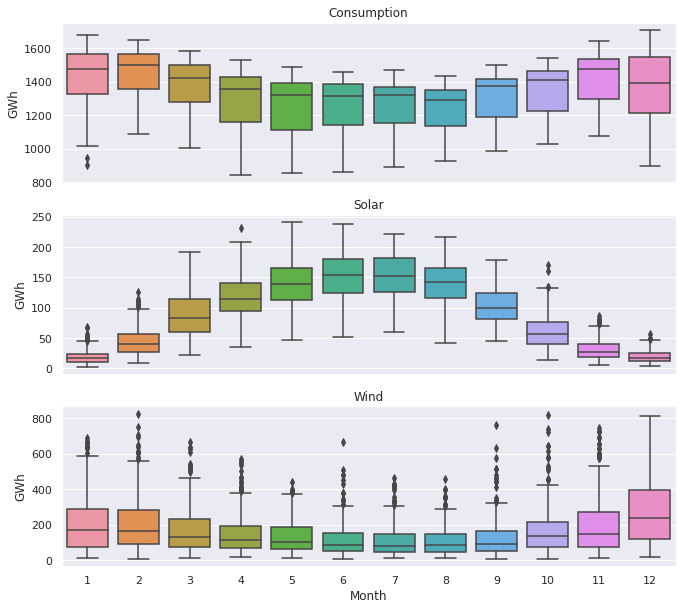

In [ ]:
# step 3 :
# Explore Seasonality
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
 sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
 ax.set_ylabel('GWh')
 ax.set_title(name)

 # Remove the automatic x-axis label from all but the bottom subplot
 if ax != axes[-1]:
    ax.set_xlabel('')

> Although electricity consumption is generally higher in winter and lower in summer, the median and lower two quartiles are lower in December and January compared to November and February, likely due to businesses being closed over the holidays. We saw this in the time series for the year 2017, and the box plot confirms that this is consistent pattern throughout the years.

> While solar and wind power production both exhibit a yearly seasonality, the wind power distributions have many more outliers, reflecting the effects of occasional extreme wind speeds associated with storms and other transient weather conditions.

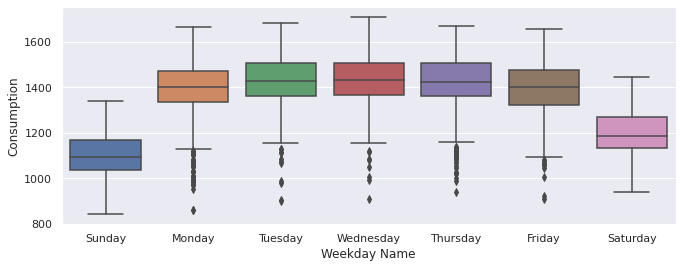

In [ ]:
# Next, let’s group the electricity consumption time series by day of the week, 
# to explore weekly seasonality.

sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption');

As expected, electricity consumption is significantly higher on weekdays than on weekends. The low outliers on weekdays are presumably during holidays.

**`Check and set the Frequencies to Daily`**

When the data points of a time series are uniformly spaced in time (e.g., hourly, daily, monthly, etc.), the time series can be associated with a **`frequency`** in pandas.

DatetimeIndex has an attribute freq with a value of 'D', indicating daily frequency. Available frequencies in pandas include hourly ('H'), calendar daily ('D'), business daily ('B'), weekly ('W'), monthly ('M'), quarterly ('Q'), annual ('A'), and few more ( as learned in earlier NB's)

Take a look at the `DatetimeIndex` of our opsd_daily time series.

In [ ]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

We can see that it has no frequency `(freq=None)`. This makes sense, since the index was created from a sequence of dates in our CSV file, without explicitly specifying any frequency for the time series.

If we know that our data should be at a specific frequency, we can use the DataFrame’s `asfreq()` method to assign a frequency. If any date/times are missing in the data, new rows will be added for those date/times, which are either empty (NaN), or filled according to a specified data filling method such as forward filling or backward filling.

In [ ]:
# for example 
# To see how this works, let’s create a new DataFrame which contains 
# only the Consumption data for Feb 3, 6, and 8, 2013.

# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])

# Select the specified dates and just the Consumption column
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
Date,
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [ ]:
# Now we use the asfreq() method to convert the DataFrame to daily frequency, 
# with a column for unfilled data, and a column for forward filled data.

# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')

# Create a column with missings forward filled
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
Date,,
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


**`Note`** : Keep in mind **`asfreq()`** method, it could be useful ahead to answer questions at the end of this project.

**`Resampling`**

It is often useful to resample our time series data to a lower or higher frequency. Resampling to a lower frequency (downsampling) usually involves an aggregation operation — for example, computing monthly sales totals from daily data.

So let’s resample our electricity consumption data to a weekly mean time series. 

In [ ]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


The first row above, labelled 2006-01-01, contains the mean of all the data contained in the time bin 2006-01-01 through 2006-01-07. The second row, labelled 2006-01-08, contains the mean data for the 2006-01-08 through 2006-01-14 time bin, and so on. By default, each row of the downsampled time series is labelled with the left edge of the time bin.

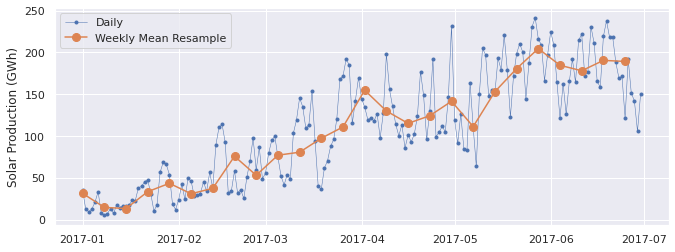

In [ ]:
# Let’s plot the daily and weekly Solar time series together over a 
# single six-month period to compare them.

# Start and end of the date range to extract
start, end = '2017-01', '2017-06'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

Now let’s resample the data to monthly frequency, aggregating with sum totals instead of the mean. `Unlike aggregating with mean(), which sets the output to NaN for any period with all missing data, the default behavior of sum() will return output of 0 as the sum of missing data`.

In [ ]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data
opsd_monthly = opsd_daily[data_columns].resample('M').sum(min_count=28)
opsd_monthly.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN
2006-04-30,38251.767,NaN,NaN,NaN
2006-05-31,38858.143,NaN,NaN,NaN


*You might notice that the monthly resampled data is labelled with the end of each month (the right bin edge), whereas the weekly resampled data is labelled with the left bin edge. By default, resampled data is labelled with the right bin edge for monthly, quarterly, and annual frequencies, and with the left bin edge for all other frequencies.*

Now let’s **`explore the monthly time series by plotting the electricity consumption as a line plot, and the wind and solar power production together as a stacked area plot`**.

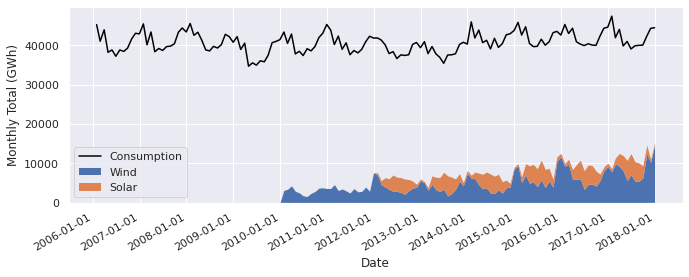

In [ ]:
fig, ax = plt.subplots()
ax.plot(opsd_monthly['Consumption'], color='black', label='Consumption')
opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

**At this monthly time scale, we can clearly see the yearly seasonality in each time series, and it is also evident that electricity consumption has been fairly stable over time, while `wind power production has been growing steadily`, with wind + solar power comprising an increasing share of the electricity consumed.**

Let’s explore this further by resampling to annual frequency and computing the ratio of Wind+Solar to Consumption for each year.

In [ ]:
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
opsd_annual = opsd_daily[data_columns].resample('A').sum(min_count=360)
# The default index of the resampled DataFrame is the last day of each year,
# ('2006-12-31', '2007-12-31', etc.) so to make life easier, set the index
# to the year component
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'
# Compute the ratio of Wind+Solar to Consumption
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual.tail(10)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2008,495570.87600,NaN,NaN,NaN,NaN
2009,459737.42800,NaN,NaN,NaN,NaN
2010,488588.70000,35911.777,NaN,NaN,NaN
2011,484814.08600,44032.951,NaN,NaN,NaN
2012,469574.75400,45862.667,27887.332,73749.999,0.157057
2013,463336.85300,47197.832,29559.780,76697.443,0.165533
2014,504164.82100,51107.672,32498.307,83370.502,0.165364
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528


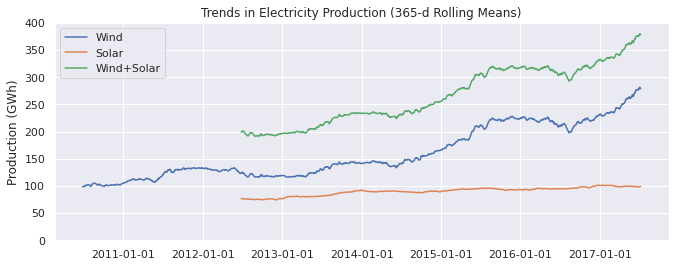

In [ ]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)');

`Observation` : We can see a small increasing trend in solar power production and a large increasing trend in wind power production, as Germany continues to expand its capacity in those sectors. 



We’ve learned how to wrangle, analyze, and visualize our time series data in pandas using techniques such as time-based indexing, resampling, and rolling windows. Applying these techniques to our OPSD data set, we’ve gained insights on **seasonality, trends, and other interesting features of electricity consumption and production in Germany.**